<a href="https://colab.research.google.com/github/ziplex1/Tool-Wear-Failure-Model/blob/main/Technical_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install ucimlrepo

In [72]:
import pandas as pd
import numpy as np
import xgboost as xg
import matplotlib.pyplot as plt
import ucimlrepo

In [73]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)

{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'title': 'Explainable Artificial Intelligence for Predictive Maintenance

In [74]:
X.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [75]:
X.drop('Type', axis=1, inplace=True)

<ipython-input-75-20bc7df267e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Type', axis=1, inplace=True)


In [76]:
X.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [77]:
y.head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [79]:
X_train, x_test, y_train, y_test = train_test_split(X, y['TWF'], test_size=0.2, random_state=42)

In [80]:
model = LogisticRegression()

model.fit( X_train, y_train )

print('accuracy of model: ',model.score(X_test, y_test))

accuracy of model:  0.994


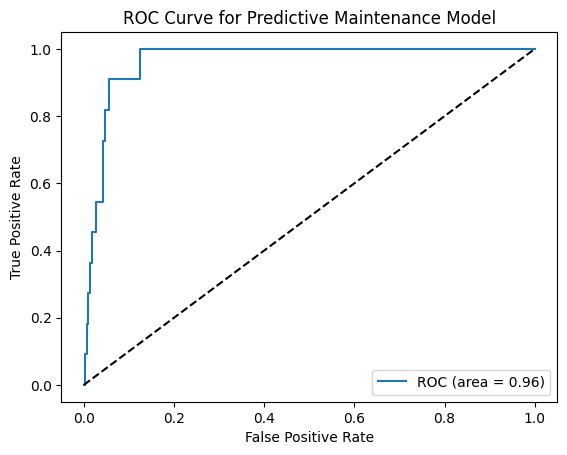

In [81]:
# prompt: make the plot from the model

import matplotlib.pyplot as plt

# make predictions
predictions = model.predict(x_test)

# calculate probabilities
probabilities = model.predict_proba(x_test)

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % metrics.auc(fpr, tpr))

# add diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Predictive Maintenance Model')

# show the plot
plt.legend()
plt.show()
